In [554]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.colors as mcolors

<h2>First Approach</h2>
<ul>
    <li>Remove all features which are clearly irrelevant</li>
    <li>Fill missing data with mean</li>
    <li>Quantify non-integer data</li>
</ul>
<h2>Data Preparation</h2>

In [555]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [556]:
sum(df.duplicated())
sum(df_test.duplicated())

0

Remove unwanted features: <br>
<ul>
    <li>Name (irrelevant to survival rate)</li>
    <li>Ticket Number (irrelevant to survival rate)</li>
    <li>Cabin Number (too many missing data)</li>
    <li>PassengerId (only for indexing purposes)</li>
</ul>

In [557]:
df.drop('Name', axis = 1, inplace = True)
df.drop('Cabin', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)

In [558]:
df_test.drop('Name', axis = 1, inplace = True)
df_test.drop('Cabin', axis = 1, inplace = True)
df_test.drop('Ticket', axis = 1, inplace = True)

Fill any missing Age data with its mean in both dataframe

In [559]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Embarked']= df['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2})

df_test['Sex'] = df_test['Sex'].replace({'male': 0, 'female': 1})
df_test['Embarked']= df_test['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2})

In [560]:
mean_age_train = df['Age'].mean()
mean_age_test = df_test['Age'].mean()

mean_embarked_train = round(df['Embarked'].mean())
mean_embarked_test = round(df_test['Embarked'].mean())

mean_fare_train = df['Fare'].mean()
mean_fare_test = df_test['Fare'].mean()

#fill missing age with mean
df['Age'].fillna(mean_age_train, inplace=True)
df_test['Age'].fillna(mean_age_test, inplace=True)

#fill missing embarked with mean
df['Embarked'].fillna(mean_embarked_train, inplace=True)
df_test['Embarked'].fillna(mean_embarked_test, inplace=True)

#fill missing fare with mean
df['Fare'].fillna(mean_fare_train, inplace=True)
df_test['Fare'].fillna(mean_fare_test, inplace=True)

#check for any rows with missing data
if df.isnull().sum().sum() == 0:
    print("There is no NaN values")
else:
    print("There is NaN values")
    
if df_test.isnull().sum().sum() == 0:
    print("There is no NaN values")
else:
    print("There is NaN values")

There is no NaN values
There is no NaN values


In [561]:
y = df.Survived;
X = df.iloc[:, df.columns != 'Survived']
X_test_output = df_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12, stratify=y)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test_output_scaled = pd.DataFrame(scaler.transform(X_test_output), columns = X_test_output.columns)

<h3>Training Set Histogram</h3>

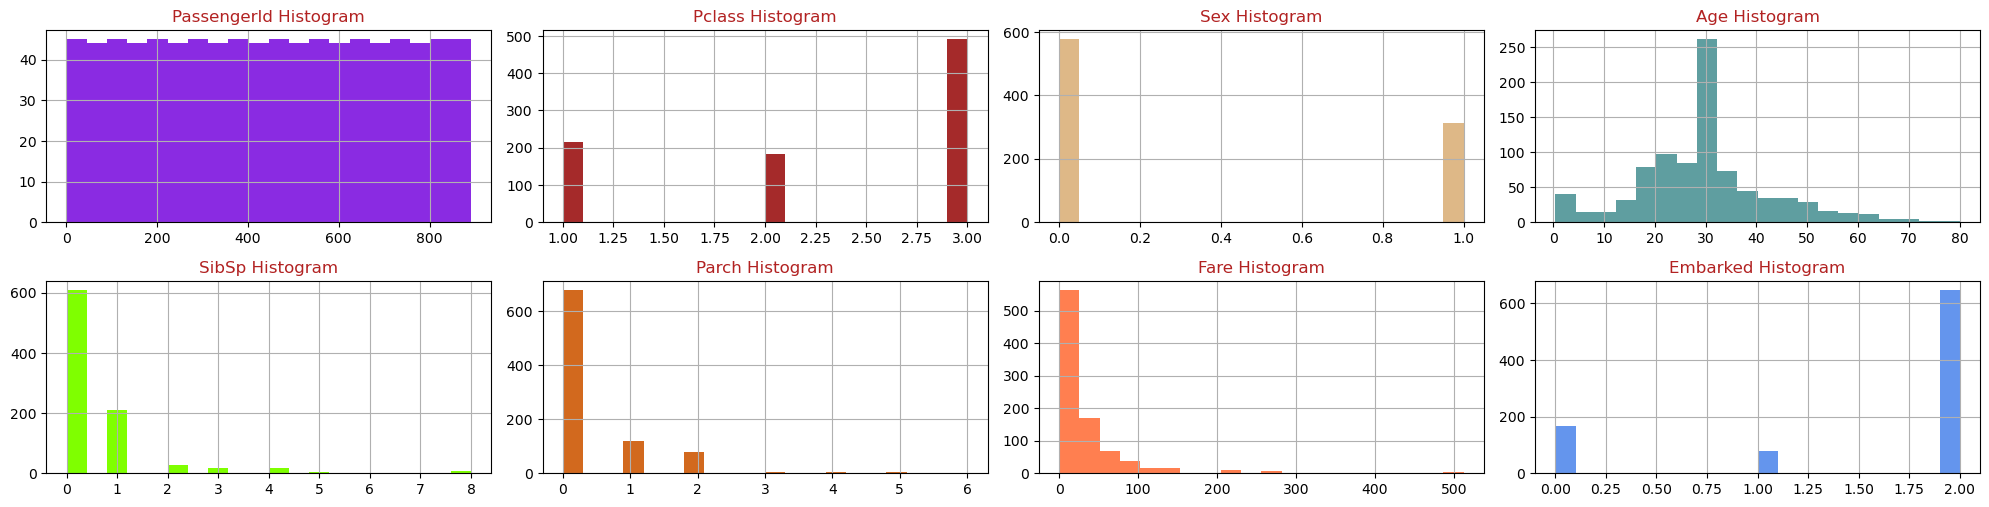

In [562]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize = (20,20))
for i, feature in enumerate(X_train.columns):
    f = fig.add_subplot(8,4,i+1)
    df[feature].hist(bins = 20, ax=f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
fig.tight_layout()
plt.show()

<h2>Building the Model, Training, and Performance</h2>

In [563]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)

train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 79.61%
The accuracy for the test set is 80.60%


              precision    recall  f1-score   support

           0       0.84      0.85      0.84       165
           1       0.75      0.74      0.75       103

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



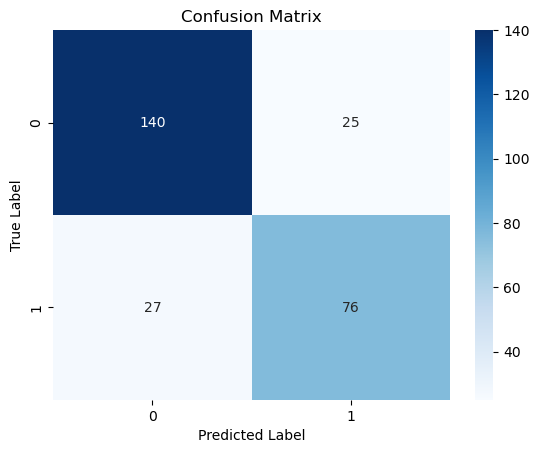

In [564]:
y_pred = model.predict(X_test_scaled)
test_report = classification_report(y_test, y_pred)
print(test_report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='d', cmap = "Blues")

plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [565]:
#Output prediction of test.csv
y_pred_output = model.predict(X_test_output_scaled)

output_df = pd.DataFrame(data=df_test['PassengerId'])
output_df['Survived'] = y_pred_output
output_df.to_csv('output.csv', index=False)

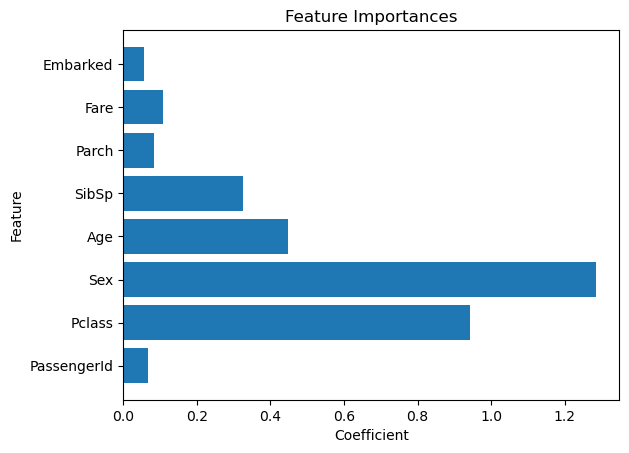

In [570]:
# Get feature importances
importances = np.abs(model.coef_[0])
features = X_train.columns

# Plot feature importances
plt.barh(features, importances)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

<h2>Second Approach</h2>

Only use the 3 most significant features (Sex, Age, Pclass)

In [586]:
X = df.drop(['Embarked', 'Fare', 'Parch', 'SibSp', 'PassengerId', 'Survived'], axis=1)
X_test_output = df_test.drop(['Embarked', 'Fare', 'Parch', 'SibSp', 'PassengerId'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12, stratify=y)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test_output_scaled = pd.DataFrame(scaler.transform(X_test_output), columns = X_test_output.columns)

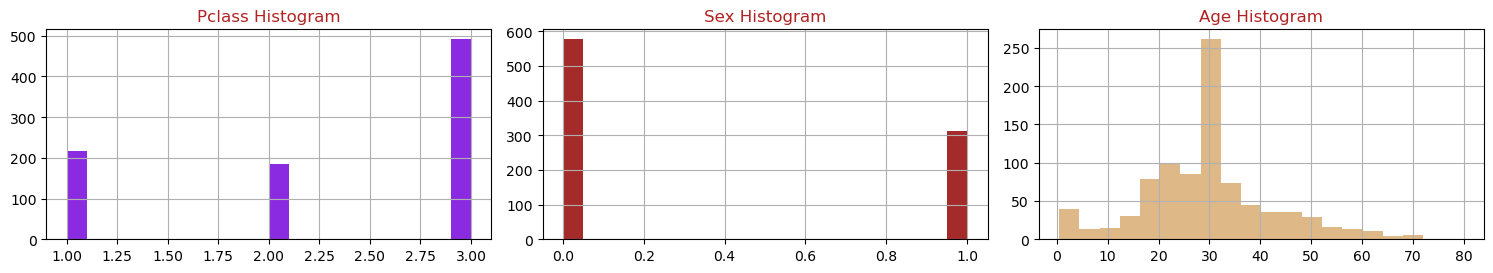

In [587]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize = (20,20))
for i, feature in enumerate(X_train.columns):
    f = fig.add_subplot(8,4,i+1)
    df[feature].hist(bins = 20, ax=f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
fig.tight_layout()
plt.show()

In [588]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)

train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 79.29%
The accuracy for the test set is 80.97%


              precision    recall  f1-score   support

           0       0.85      0.84      0.84       165
           1       0.75      0.76      0.75       103

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



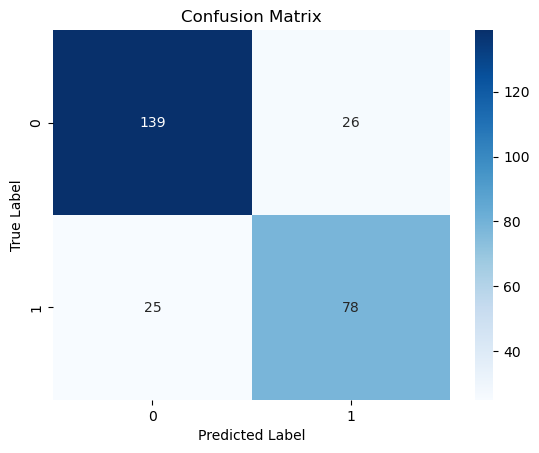

In [589]:
y_pred = model.predict(X_test_scaled)
test_report = classification_report(y_test, y_pred)
print(test_report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='d', cmap = "Blues")

plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [590]:
#Output prediction of test.csv
cols_to_test = ['Age', 'Sex', 'Pclass']
y_pred_output = model.predict(X_test_output_scaled)

output_df = pd.DataFrame(data=df_test['PassengerId'])
output_df['Survived'] = y_pred_output
output_df.to_csv('output2.csv', index=False)

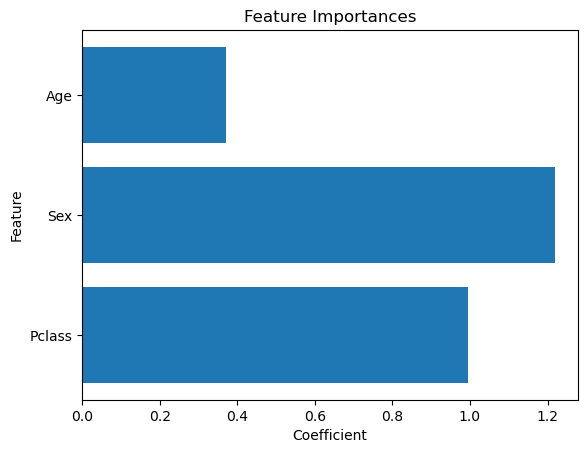

In [591]:
# Get feature importances
importances = np.abs(model.coef_[0])
features = X_train.columns

# Plot feature importances
plt.barh(features, importances)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()